<a href="https://colab.research.google.com/github/adhang/learn-tensorflow/blob/main/CNN_Carelessness_in_Driving_(InceptionV3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN - Carelessness in Driving a Car (Using InceptionV3)

Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

# Libraries

In [ ]:
# file handling
import os
import shutil
from shutil import unpack_archive
import glob

# data manipulation
import numpy as np
import pandas as pd

# data viz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# tensorflow
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3

from sklearn.model_selection import train_test_split

# Reading Datasets

## Download Datasets

In [ ]:
# download image data
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/5460fcc87e2d7f7e19c17f719e0df00a/train_1.zip'

--2022-06-21 03:38:48--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 52.217.161.137
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|52.217.161.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58948996 (56M) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>]  56.22M   100MB/s    in 0.6s    

2022-06-21 03:38:49 (100 MB/s) - ‘test.zip’ saved [58948996/58948996]

--2022-06-21 03:38:49--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 52.217.161.137
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|52.217.161.137|:443... c

## Extract Dataset

In [ ]:
# extract train dataset (with label)
print('Extracting Train Dataset : Label 0')
unpack_archive('train_0.zip', '')

print('Extracting Train Dataset : Label 1')
unpack_archive('train_1.zip', '')

# extract test dataset (without label)
print('Extracting Test Dataset')
unpack_archive('test.zip', '')

print('Dataset Extracted')

# remove original zip files
print('Removing Zip Files')
os.remove('train_1.zip')
os.remove('train_0.zip')
os.remove('test.zip')
print('Zip Files Removed')

# rename train dataset directory
print('Renaming Train Directory')
os.rename('train', 'data')

Extracting Train Dataset : Label 0
Extracting Train Dataset : Label 1
Extracting Test Dataset
Dataset Extracted
Removing Zip Files
Zip Files Removed
Renaming Train Directory


## Accessing Images

In [ ]:
# path to data (originally train set)
data_dir = '/content/data/'
data_0_dir = os.path.join(data_dir, '0')
data_1_dir = os.path.join(data_dir, '1')

# path to test set
test_dir = '/content/test'

### File Names

In [ ]:
data_0_names = os.listdir(data_0_dir)
print('Images with label 0')
print(data_0_names[:5])
print()

data_1_names = os.listdir(data_1_dir)
print('Images with label 1')
print(data_1_names[:5])
print()

test_names = os.listdir(test_dir)
print('Test images')
print(test_names[:5])

Images with label 0
['img_5264.jpg', 'img_64443.jpg', 'img_63151.jpg', 'img_68798.jpg', 'img_14715.jpg']

Images with label 1
['img_55108.jpg', 'img_31885.jpg', 'img_35327.jpg', 'img_1617.jpg', 'img_78675.jpg']

Test images
['img_64030.jpg', 'img_60142.jpg', 'img_11658.jpg', 'img_49198.jpg', 'img_12773.jpg']


### Total Files

In [ ]:
print('total image with label 0:', len(os.listdir(data_0_dir)))
print('total image with label 1:', len(os.listdir(data_1_dir)))
print('total test images:', len(os.listdir(test_dir)))

total image with label 0: 2026
total image with label 1: 1989
total test images: 1401


### Visualize

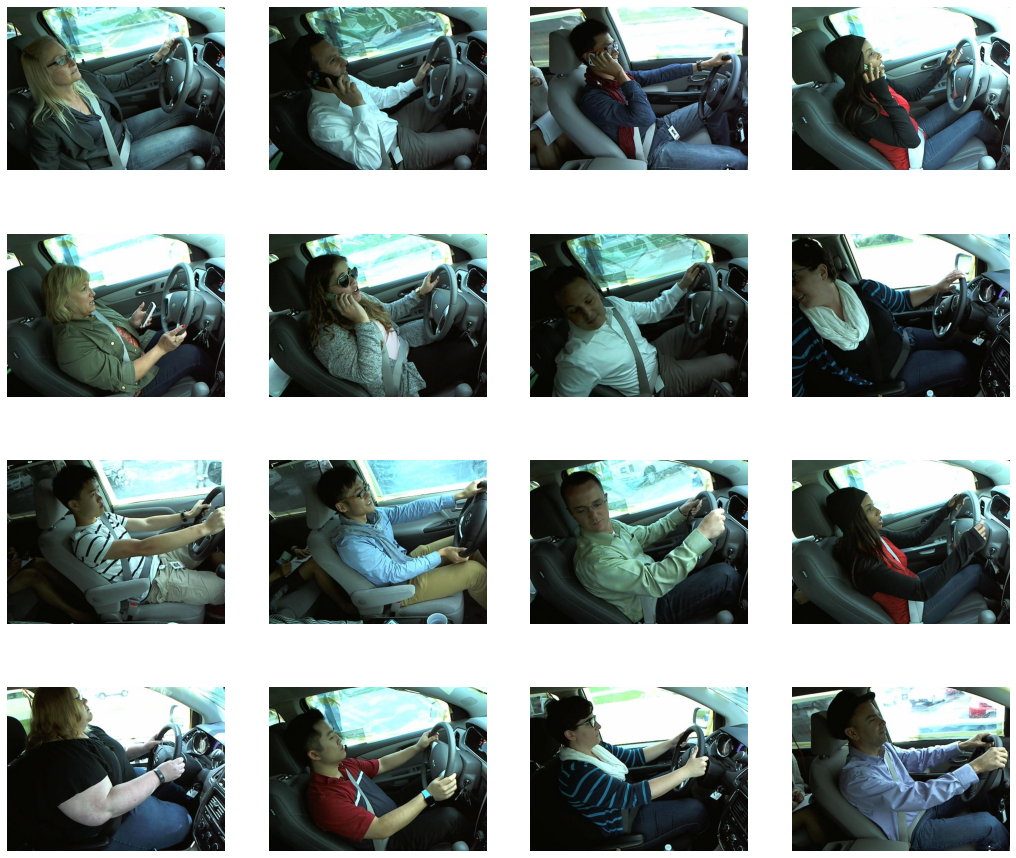

In [ ]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_data_0_pix = [os.path.join(data_0_dir, fname) for fname in data_0_names[pic_index-8:pic_index]]
next_data_1_pix = [os.path.join(data_1_dir, fname) for fname in data_1_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_data_0_pix + next_data_1_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Data Preparation

## Create Validation Set

### Directory Preparation

In [ ]:
data_dir = '/content/data'
base_dir = '/content'

# path to the original dataset before splitting
data_dir = '/content/data/'
data_0_dir = os.path.join(data_dir, '0')
data_1_dir = os.path.join(data_dir, '1')

# path to the splitted dataset
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_0_dir = os.path.join(train_dir, '0')
train_1_dir = os.path.join(train_dir, '1')

val_0_dir = os.path.join(val_dir, '0')
val_1_dir = os.path.join(val_dir, '1')

In [ ]:
# create the directory for storing the splitted dataset
os.mkdir(train_dir)
os.mkdir(val_dir)

# create the sub directory for storing the splitted dataset
os.mkdir(train_0_dir)
os.mkdir(train_1_dir)
os.mkdir(val_0_dir)
os.mkdir(val_1_dir)

### Splitting Dataset

In [ ]:
train_0_file, val_0_file = train_test_split(os.listdir(data_0_dir), test_size = 0.3, random_state=1)
train_1_file, val_1_file = train_test_split(os.listdir(data_1_dir), test_size = 0.3, random_state=1)

### Storing Splitted Dataset

In [ ]:
for file in train_0_file:
  shutil.copy(os.path.join(data_0_dir, file), os.path.join(train_0_dir, file))

for file in train_1_file:
  shutil.copy(os.path.join(data_1_dir, file), os.path.join(train_1_dir, file))

for file in val_0_file:
  shutil.copy(os.path.join(data_0_dir, file), os.path.join(val_0_dir, file))

for file in val_1_file:
  shutil.copy(os.path.join(data_1_dir, file), os.path.join(val_1_dir, file))

## Data Generator

### Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
  rescale = 1./255,
  rotation_range = 30,
  # width_shift_range=0.2,
  # height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip = True,
  # shear_range = 0.35,
  fill_mode = 'nearest',
)

# validation data should not be augmented
val_datagen = ImageDataGenerator(
  rescale = 1./255,
)

### Flow Images

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2810 images belonging to 2 classes.
Found 1205 images belonging to 2 classes.


# Model Development

We will need to prepare pretrained model and configure the layers that we need. For this exercise, we will use the convolution layers of the InceptionV3 architecture as our base model. To do that, we need to:

1. Set the input shape to fit our application. In this case, set it to 150x150x3 as we've been doing in the last few labs.

2. Pick and freeze the convolution layers to take advantage of the features it has learned already.

3. Add dense layers which we will train.

## Download Weight

First, in preparing the input to the model, we want to fetch the pretrained weights of the InceptionV3 model and remove the fully connected layer at the end because we will be replacing it later. We will also specify the input shape that our model will accept. Lastly, we want to freeze the weights of these layers because they have been trained already.

In [ ]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-06-21 03:39:08--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.0.48, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.0.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   152MB/s    in 0.6s    

2022-06-21 03:39:08 (152 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Set the weights file we downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

## Initialize Base Model

In [ ]:
# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

# Load the pre-trained weights we downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

## Choose Base Model

We can then select up to which point of the network we want to use. We will use up to `mixed_7` as our base model and add to that. This is because the original last layer might be too specialized in what it has learned so it might not translate well into our application. `mixed_7` on the other hand will be more generalized and we can start with that for our application. Feel free to modify and use other layers to see what the results we get.

In [ ]:
# Choose `mixed_7` as the last layer of our base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


## Add Dense Layer

Next, we will add dense layers to our model. These will be the layers that we will train and is tasked with recognizing carelessness in driving a car. We will add a `Dropout` layer as well to regularize the output and avoid overfitting.

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                            

## Callbacks

In [ ]:
callbacks = [
  tf.keras.callbacks.EarlyStopping(
    # Stop training when 'val_loss' is no longer improving
    monitor='val_loss',
    # 'no longer improving' being defined as 'no better than 1e-2 less'
    min_delta=1e-2,
    # 'no longer improving' being further defined as 'for at least 2 epochs'
    patience=2,
    verbose=1,
  )
]

## Compile

In [ ]:
# Set the training parameters
model.compile(optimizer = 'adam',
              # optimizer = RMSprop(learning_rate=0.0001),
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

## Fitting

In [ ]:
history = model.fit(train_generator,
                    epochs = 20,
                    batch_size = 32,
                    validation_batch_size = 32,
                    validation_data = val_generator,
                    # callbacks = callbacks,
                    verbose = 1)

Epoch 1/20
88/88 [==============================] - 35s 359ms/step - loss: 0.7537 - accuracy: 0.7954 - val_loss: 0.2900 - val_accuracy: 0.8697
Epoch 2/20
88/88 [==============================] - 30s 345ms/step - loss: 0.2071 - accuracy: 0.9149 - val_loss: 0.1168 - val_accuracy: 0.9577
Epoch 3/20
88/88 [==============================] - 30s 344ms/step - loss: 0.1546 - accuracy: 0.9399 - val_loss: 0.0699 - val_accuracy: 0.9776
Epoch 4/20
88/88 [==============================] - 30s 346ms/step - loss: 0.1523 - accuracy: 0.9438 - val_loss: 0.1002 - val_accuracy: 0.9627
Epoch 5/20
88/88 [==============================] - 30s 345ms/step - loss: 0.1112 - accuracy: 0.9605 - val_loss: 0.0532 - val_accuracy: 0.9834
Epoch 6/20
88/88 [==============================] - 30s 343ms/step - loss: 0.1048 - accuracy: 0.9626 - val_loss: 0.0554 - val_accuracy: 0.9801
Epoch 7/20
88/88 [==============================] - 30s 345ms/step - loss: 0.1270 - accuracy: 0.9544 - val_loss: 0.0511 - val_accuracy: 0.9793

## Learning Curve (RMSprop - No Callbacks)

### Loss Viz

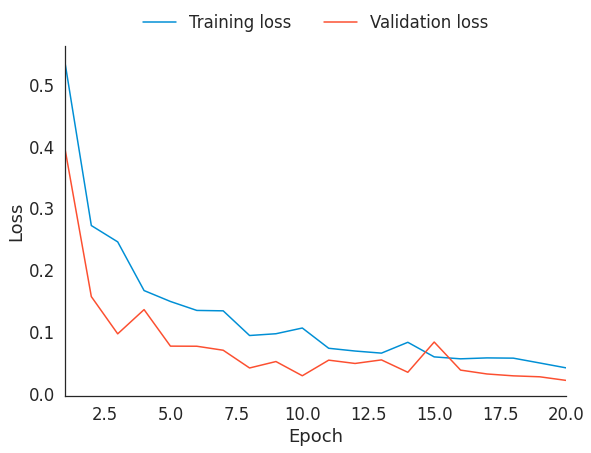

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1,len(history.history['loss'])+1)

sns.lineplot(x=epochs, y=history.history['loss'], 
             label='Training loss', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_loss'], 
             label='Validation loss', ax=ax)

ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_xlim(1, len(epochs))
ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

sns.despine()
plt.show()

### Accuracy Viz

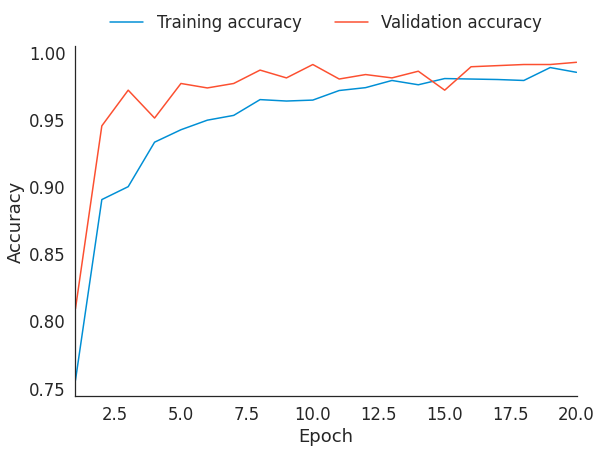

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1,len(history.history['accuracy'])+1)

sns.lineplot(x=epochs, y=history.history['accuracy'], 
             label='Training accuracy', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_accuracy'], 
             label='Validation accuracy', ax=ax)

ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_xlim(1, len(epochs))
ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

sns.despine()
plt.show()

## Learning Curve (RMSprop - Callbacks)

### Loss Viz

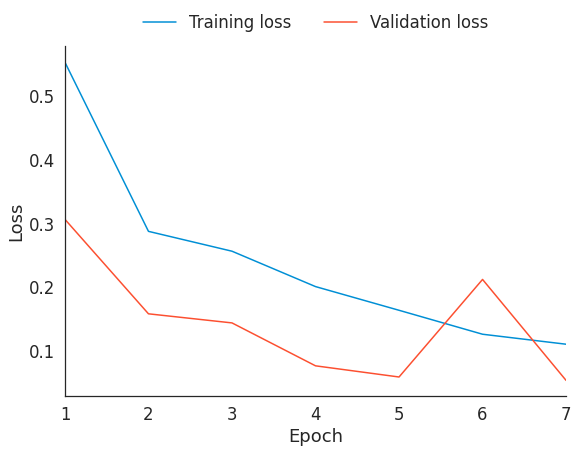

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1,len(history.history['loss'])+1)

sns.lineplot(x=epochs, y=history.history['loss'], 
             label='Training loss', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_loss'], 
             label='Validation loss', ax=ax)

ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_xlim(1, len(epochs))
ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

sns.despine()
plt.show()

### Accuracy Viz

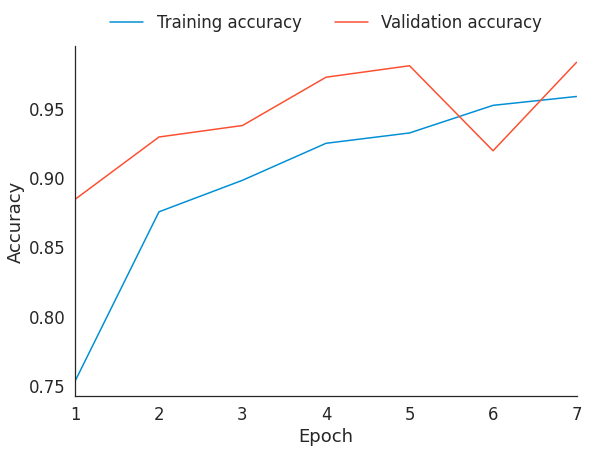

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1,len(history.history['accuracy'])+1)

sns.lineplot(x=epochs, y=history.history['accuracy'], 
             label='Training accuracy', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_accuracy'], 
             label='Validation accuracy', ax=ax)

ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_xlim(1, len(epochs))
ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

sns.despine()
plt.show()

## Learning Curve (Adam - No Callbacks)

### Loss Viz

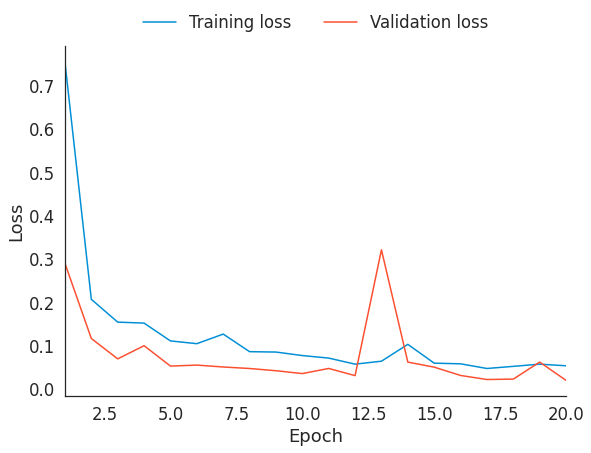

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1,len(history.history['loss'])+1)

sns.lineplot(x=epochs, y=history.history['loss'], 
             label='Training loss', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_loss'], 
             label='Validation loss', ax=ax)

ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_xlim(1, len(epochs))
ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

sns.despine()
plt.show()

### Accuracy Viz

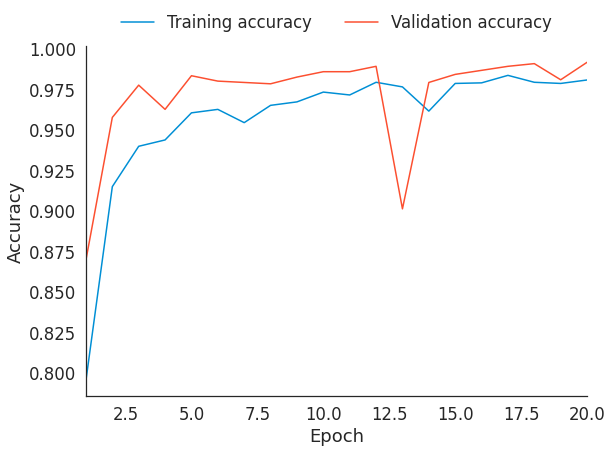

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1,len(history.history['accuracy'])+1)

sns.lineplot(x=epochs, y=history.history['accuracy'], 
             label='Training accuracy', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_accuracy'], 
             label='Validation accuracy', ax=ax)

ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_xlim(1, len(epochs))
ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

sns.despine()
plt.show()

## Learning Curve (Adam - Callbacks)

### Loss Viz

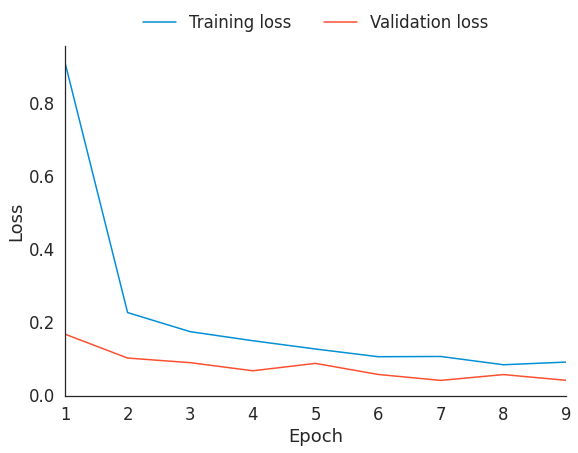

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1,len(history.history['loss'])+1)

sns.lineplot(x=epochs, y=history.history['loss'], 
             label='Training loss', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_loss'], 
             label='Validation loss', ax=ax)

ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_xlim(1, len(epochs))
ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

sns.despine()
plt.show()

### Accuracy Viz

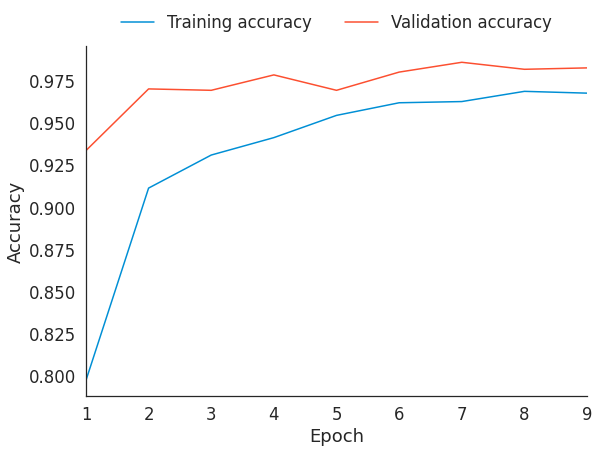

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1,len(history.history['accuracy'])+1)

sns.lineplot(x=epochs, y=history.history['accuracy'], 
             label='Training accuracy', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_accuracy'], 
             label='Validation accuracy', ax=ax)

ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_xlim(1, len(epochs))
ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

sns.despine()
plt.show()

# Submission

## Prediction

Code inspired from [here](https://gist.github.com/ritiek/5fa903f97eb6487794077cf3a10f4d3e)

In [ ]:
img_width, img_height = 150, 150

# load all images into a list
images = list()
image_names = list()
for img in glob.glob(os.path.join(test_dir, '*.jpg')):
  # save the file name
  image_names.append(os.path.basename(img))
  
  img = os.path.join(test_dir, img)
  img = image.load_img(img, target_size=(img_width, img_height))
  img = image.img_to_array(img)
  img = img/255.0
  img = np.expand_dims(img, axis=0)
  images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict(images, batch_size=10)
print(classes)

[[9.9999714e-01]
 [5.2732456e-04]
 [9.9999964e-01]
 ...
 [3.1739573e-06]
 [4.1464420e-05]
 [9.8565453e-01]]


## Save to CSV

In [ ]:
pred_list = list(zip(image_names, classes.astype(int).flatten()))
pred_df = pd.DataFrame(pred_list, columns=['file', 'label'])

pred_df.to_csv('submission.csv', index=False)